In [3]:
import numpy as np
import matplotlib.pyplot as plt

from utils import ax_default

In [4]:
cost_cum = [1, 2, 3, 4 ,5 ,6, 7]
cost_cum = np.cumsum(cost_cum)
cost_alloc = {'Cathode': {'(0,)': 1, '(1,)': 2}, 'Thruster': {'(0, 0)': 3, '(0, 1)': 5, '(1, 0)': 6}, 'Plume': {'(0,)': 4, '(1,)': 7}}

Cathode (0,) 1 0 0.03571428571428571
Cathode (1,) 2 0 0.07142857142857142
Thruster (0, 0) 3 1 0.10714285714285714
Thruster (0, 1) 5 1 0.17857142857142858
Thruster (1, 0) 6 1 0.21428571428571427
Plume (0,) 4 2 0.14285714285714285
Plume (1,) 7 2 0.25


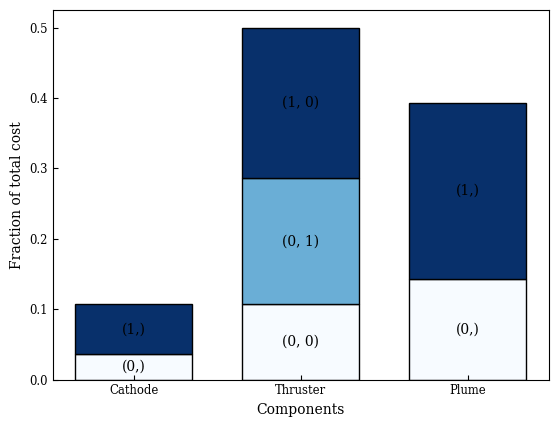

In [21]:
# Bar chart showing cost allocation breakdown
fig, ax = plt.subplots()
width = 0.7
x = np.arange(len(cost_alloc))
xlabels = list(cost_alloc.keys())
cmap = plt.get_cmap('Blues')
for j, (node, alpha_dict) in enumerate(cost_alloc.items()):
    bottom = 0
    c_intervals = np.linspace(0, 1, len(alpha_dict))
    for i, (alpha, cost) in enumerate(alpha_dict.items()):
        p = ax.bar(x[j], cost / cost_cum[-1], width, color=cmap(c_intervals[i]), linewidth=1, edgecolor=[0, 0, 0],
               bottom=bottom)
        bottom += cost / cost_cum[-1]
        ax.bar_label(p, labels=[str(alpha)], label_type='center')
ax_default(ax, "Components", "Fraction of total cost", legend=False)
ax.set_xticks(x, xlabels)
plt.show()